# Tarea Semanal 3
A partir de la siguiente plantilla, sabiendo que:

  


| ⍺máx [dB] | ⍺mín [dB] | fp [Hz] | fs [Hz] |
| --------- | --------- | ------- | ------- |
| 1 | 35 | 3500 | 1000 |



1) Obtener polos y ceros para máxima planicidad en la banda de paso.

2) Implementar el circuito con estructuras pasivas adaptadas mediante buffers.

3) Utilizando una norma de impedancia ZN = 1K, obtenga el valor de los componentes.

4) Active las bobinas utilizando una estructura con OPAMPs.

### Obtener polos y ceros para máxima planicidad en la banda de paso.

$ W_p = 1 $   
$ W_s = \frac{W_s'}{W_p'} = \frac{1000 Hz}{3500 Hz} = 0,2857 $  
$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot w^(2n)} $   
$ |T(jw)|^2 |w=1 = \frac{1}{1 + \epsilon^2} = \frac{1}{\alpha^2_m}$  
$ \alpha$<sub>max</sub> $=  \sqrt{1 + \epsilon^2}$   
$ \alpha$<sub>max-dB</sub> $=  10 \cdot log(1 + \epsilon^2) $     
$ \epsilon = \sqrt{10^{\frac{\alpha_mdB}{10}} - 1} $
$ \epsilon = \sqrt{10^{\frac{1}{10}} - 1} $  
$ \epsilon = 0,5088 $  

### Obtener la transferencia como pasabajos.

$ W_{sPB} = \frac{1}{W_s} = 3,5 $  
$ \alpha_{mindB} = 10 \cdot log(1 + \epsilon^2 \cdot W_{sPB}^{2n}) $  
$ n = 4 -> \alpha = 37,67 dB $  
$ |T(jw))|^2 |w=\frac{s}{j} = \frac{1}{1 + \epsilon^2 \cdot s^(2 \cdot 4)} = T(s) \cdot T(-s) $  

#### Diseño como butter
$ \Omega_{W} = W_B = \epsilon^{\frac{-1}{n}} \cdot W_p' = \epsilon^{\frac{-1}{4}} \cdot 2 \pi \cdot 3500 Hz $  
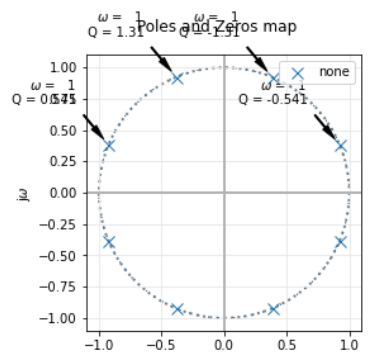
Lo divido en 2 filtron de orden 2:  
$ Q_1 = \frac{1}{2 \cdot cos(\frac{\pi}{8})} = 0,5412 $  
$ Q_2 = \frac{1}{2 \cdot cos(\frac{3\pi}{8})} = 1,306 $   
$ T_1(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_1} + W_0^2} $  
$ T_2(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_2} + W_0^2} $  
$ L_1 = Q_1   L_2 = Q_2  C_1 = \frac{1}{Q_1}  C_2 = \frac{1}{Q_2} $

### Circuito normalizado
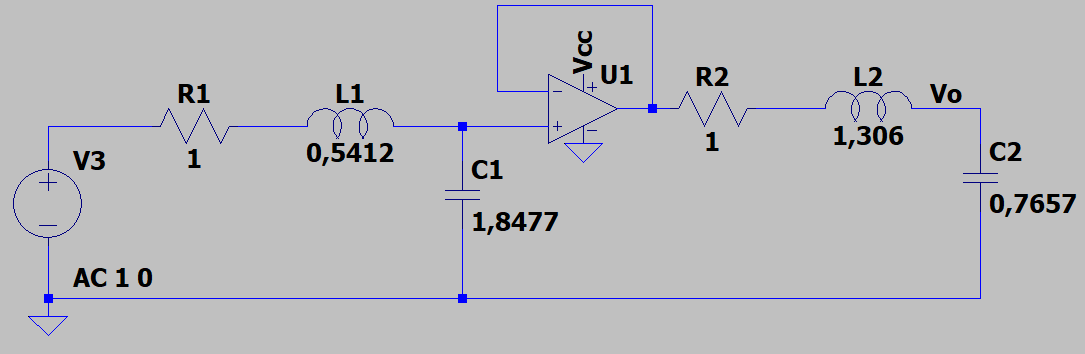

## Transformación circuital a pasa altos
$ Z_L = p \cdot L = \frac{L}{s} = \frac{1}{C_{eq} \cdot s} $  
$ Z_C = \frac{1}{p \cdot C} = \frac{s}{C} = L_{eq} \cdot s $  

$ C_{eq1} = \frac{1}{L_1} = 1,8477 $  
$ C_{eq2} = \frac{1}{L_2} = 0,7657 $  
$ L_{eq1} = \frac{1}{C_1} = 0,5412 $  
$ L_{eq2} = \frac{1}{C_2} = 1,306 $  

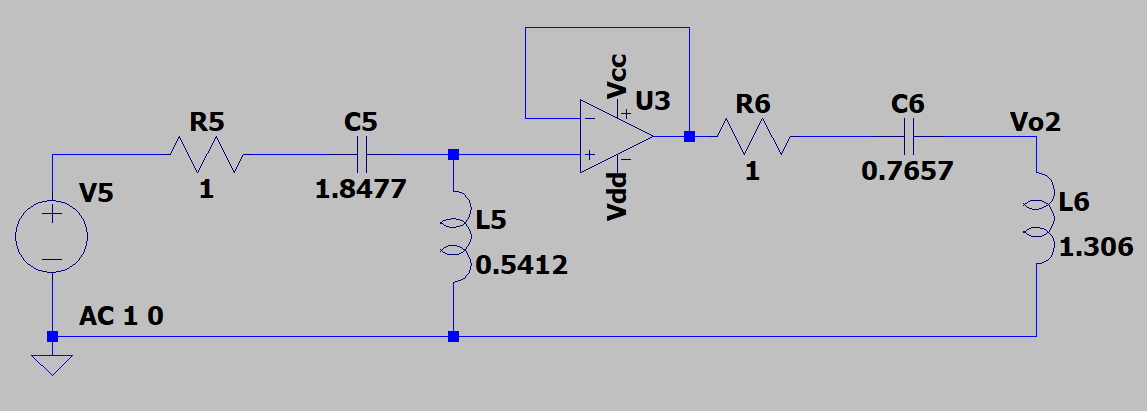

#### Desnormalizar:  
Como estoy en pasa-altos cuando desnormalice el $\Omega_W$ tengo que usar $\epsilon^{\frac{1}{n}}$  
$ R^D = R \cdot \Omega_Z = 1 \cdot 1k = 1k $  
$ L^D = \frac{L \cdot \Omega_Z}{\Omega_W} $  
$ L^D_1 = \frac{Q_1 \cdot 1k}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_1 = \frac{0,5412 \cdot 1k}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_1 = 29,14 mHy $  
$ L^D_2 = \frac{Q_2 \cdot 1k}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_2= \frac{1,306 \cdot 1k}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz} $  
$ L^D_2 = 70,32 mHy $  
$ C^D = \frac{C}{\Omega_W \cdot \Omega_Z} $  
$ C^D_1 = \frac{1}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot Q_1} $  
$ C^D_1 = \frac{1}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot 0,5412} $  
$ C^D_1 = 99,5 nF $
$ C^D_2 = \frac{1}{\epsilon^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot Q_2} $  
$ C^D_2 = \frac{1}{0,5088^{\frac{1}{4}} \cdot 2 \pi \cdot 3500 Hz \cdot 1k \cdot 1,306} $  
$ C^D_2 = 41,23 nF $  

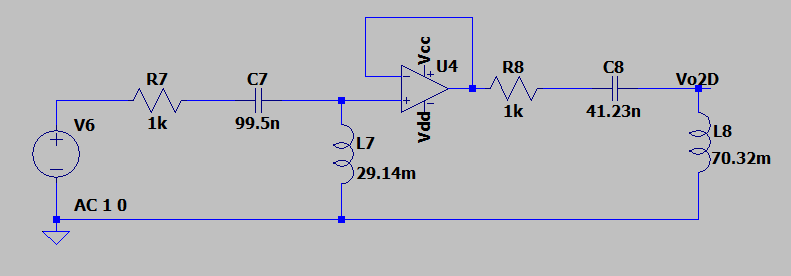
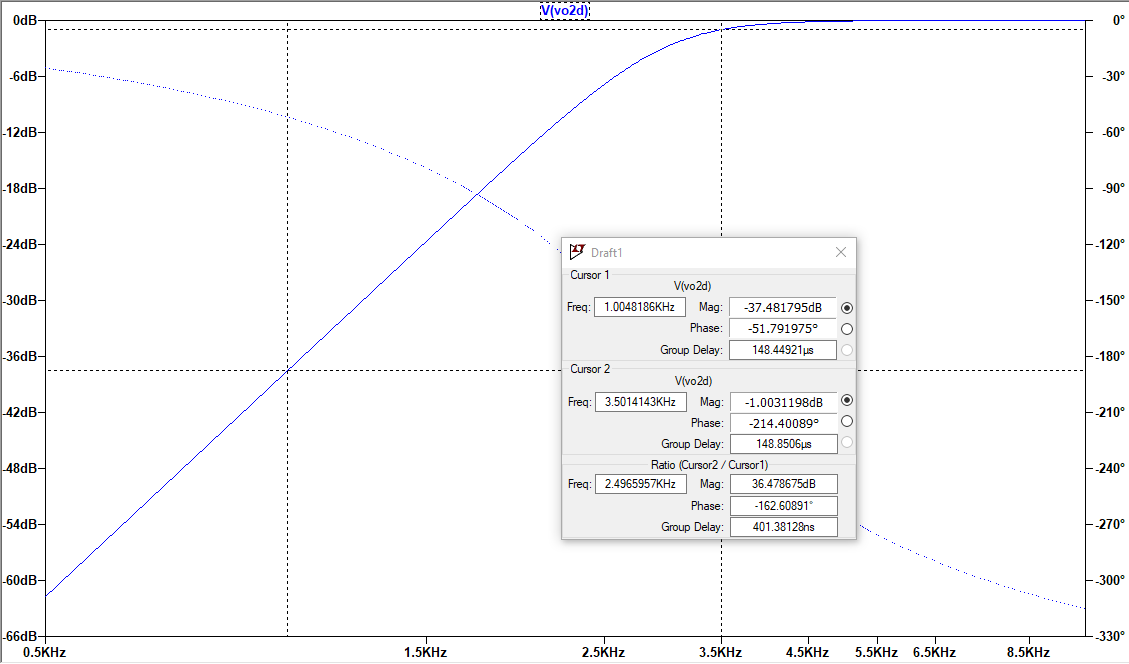

## Activar los inductores con OPAMPS
Como ambos inductores estan referidos a masa, puedo resolverlo utilizando unicamente 2 OPAMPS por inductor de forma tal que:
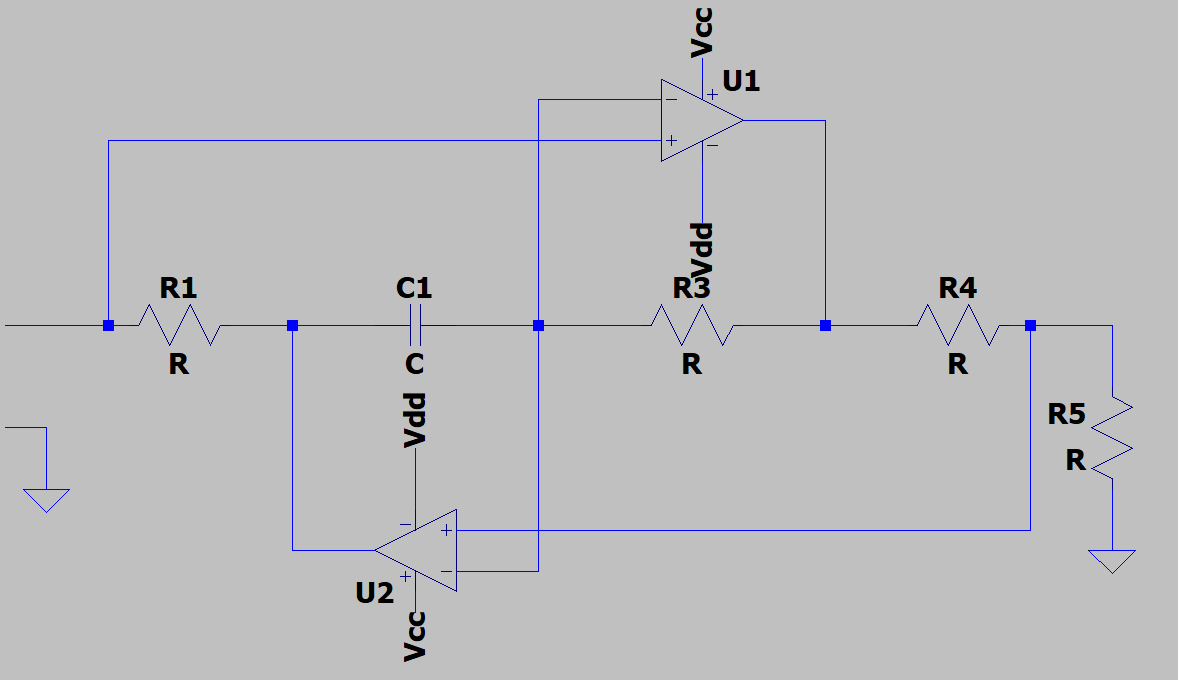
$ L^D_1 = 29,14 mHy $  
$ L^D_1 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_1 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 1k $  
$ C = 29,14 nF $  
$ L^D_2 = 70,32 mHy $  
$ L^D_2 = \frac{Z_1 \cdot Z_2 \cdot Z_3}{Z_3 \cdot Z_5} $   
$ L^D_2 = s \cdot R^2 \cdot C $  
Elijo:
$ R = 1k $  
$ C = 70,32 nF $

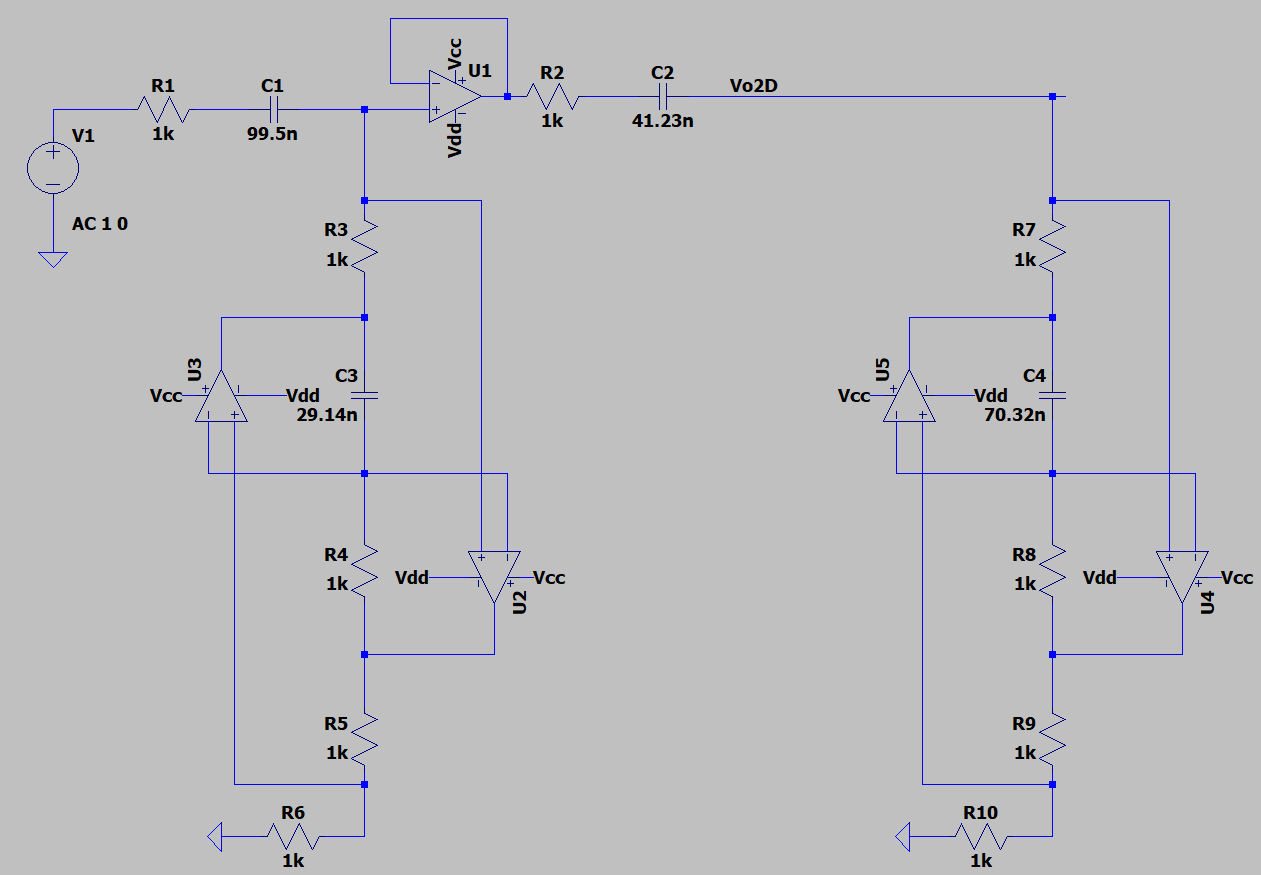
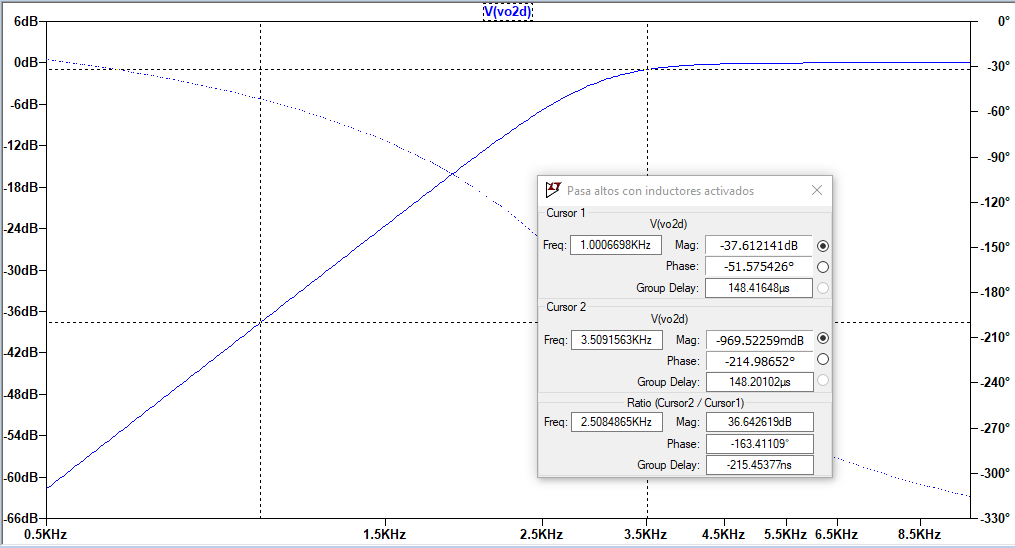

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

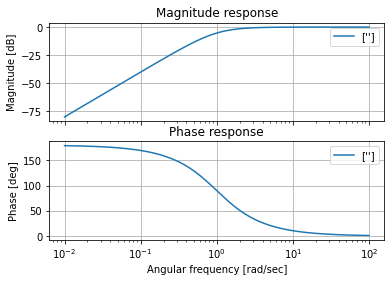

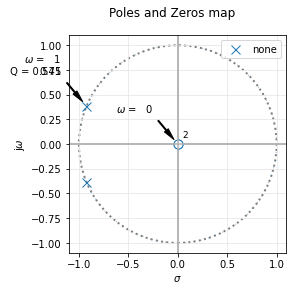

In [14]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

w01 = 1
Q1 = 0.5412

numerador1 = [1,0,0]
denominador1 = [1,w01/Q1,w01**2]

my_tf1 = TransferFunction(numerador1, denominador1)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

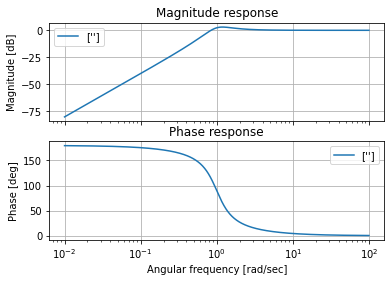

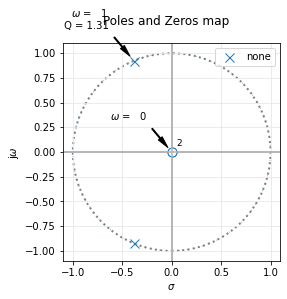

In [4]:
w02 = 1
Q2 = 1.306

numerador2 = [1,0,0]
denominador2 = [1,w02/Q2,w02**2]

my_tf2 = TransferFunction(numerador2, denominador2)

bodePlot(my_tf2,1)

pzmap(my_tf2,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

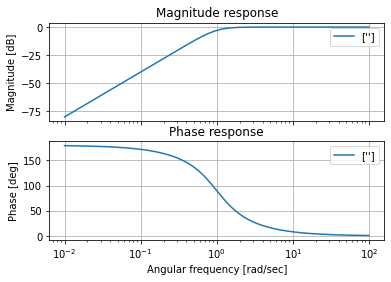

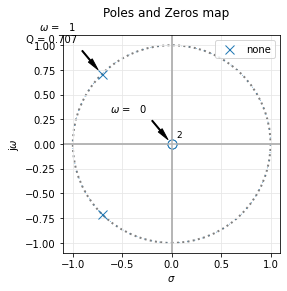

In [16]:
numerador3 = np.multiply(numerador1,numerador2)
denominador3 = np.multiply(denominador1,denominador2)

my_tf = TransferFunction(numerador3, denominador3)

bodePlot(my_tf,1)

pzmap(my_tf,2)